In [3]:
import pandas as pd
import numpy as np
import sys
sys.path.append('../')
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

from machinelearning.mlpipeline import MLPipelines
from machinelearning.mlexplain import MLExplainer
from dataloader.eda import DataExplorer

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##### Data file 

In [4]:
csv_dir = "../data/ST000369.csv"
label = "Class"

##### Perform Data Exploration using `DataExplorer` 

Use `DataExplorer` class to perform an Explanatory Data Analysis on a metabolomics dataset

In [5]:
# explorer = DataExplorer(csv_dir=csv_dir, label=label)

In [6]:
# explorer.correlations(get_table=False, num_of_best_features=10)

In [7]:
# explorer.pairplots_function(num_of_best_features=4)

In [8]:
# _ = explorer.statistical_difference(num_of_best_features=5)

In [9]:
# data_pca = explorer.pca_plot(components_plot=3)

In [10]:
# explorer.umap_plot()

##### Load data and initialize `MLPipelines` 

Use `MLPipelines` class to load a metabolomics dataset for further analysis

In [11]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
mlpipe = MLPipelines(label=label, csv_dir=csv_dir)
print(mlpipe)

Label mapping: {0: 0.0, 1: 1.0}
There is no selected classifier.
Number of rows: 80 
Number of columns: 182


Perform model selection using **Nested Cross Validation**

In [13]:
# scores, features_list, all_featues = mlpipe.model_selection(include=[LogisticRegression(), GaussianNB()], inner_splits=3, outer_splits=3, rounds=1, num_features=[2,5,10])

Train the final classifier using __Randomized Search__, __Grid Search__ or __Bayesian Search__.

In [14]:
mlpipe.normalize()
mlpipe.missing_values()

Converting the raw data with minmax normalization method....
Normalization completed.
Number of missing values: 8


In [15]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

print('Training with RandomizedSearchCV:')
mlpipe.random_search(estimator=RandomForestClassifier(), parameter_grid=param_grid)

# print('Training with GridSearchCV:')
# mlpipe.grid_search(estimator=XGBClassifier(), parameter_grid=param_grid)

# print('Training with Bayesian Search using Optuna:')
# mlpipe.bayesian_search(n_trials=100)

Training with RandomizedSearchCV:


Estimator: RandomForestClassifier
Best parameters: {'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best matthews_corrcoef: 0.3114418134938829


Perform _model validation_ using __Bootstrap validation__

  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 76.12it/s]


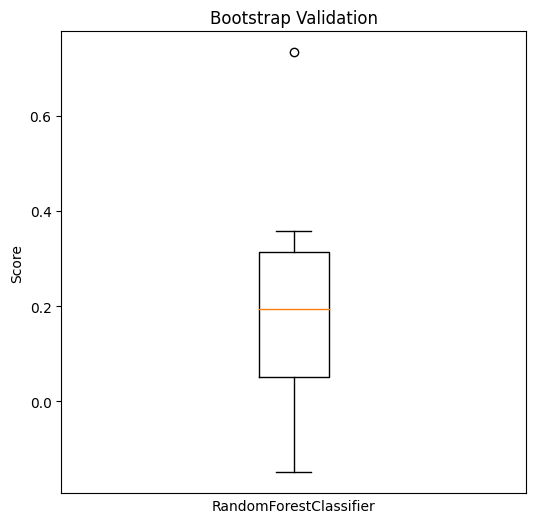

In [16]:
boot_scores = mlpipe.bootstrap_validation(n_iter=10)

##### Explainable ML and SHAP values using `MLExplainer` 

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
explainer = MLExplainer(estimator=mlpipe.best_estimator, X=mlpipe.X, y=mlpipe.y, label_mapping=mlpipe.label_mapping)

In [20]:
explainer.calculate_shap_values(explainer_type='tree')

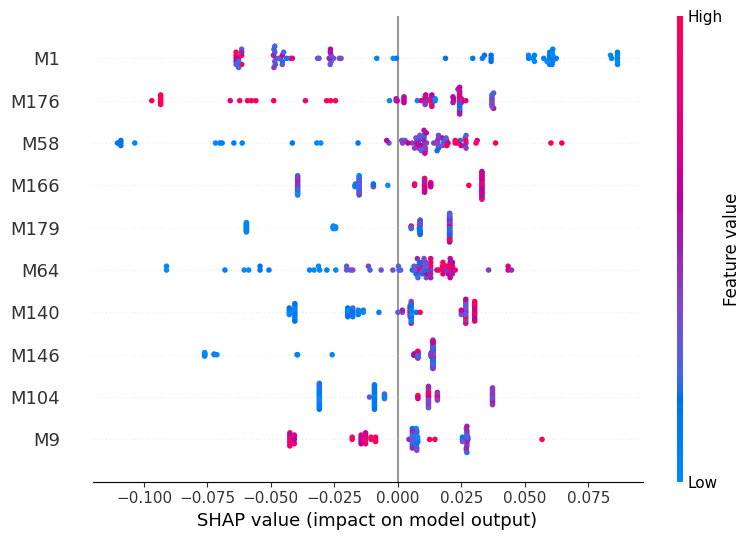

The plot is for label 1, corresponding to 1.0


In [25]:
explainer.plot_shap_values()